### 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np
import os
import openpyxl
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report, precision_recall_curve, f1_score
from sklearn.cluster import KMeans
from ModelClasses import DataProcessing, ModelClass
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


### 2. Preparing data

In [2]:
processor= DataProcessing('/Users/michalchruszczewski/Documents/Inżynieria Danych- Big Data/Projekt końcowy/Praca dyplomowa/Data/fbref_db.xlsx')
data= processor.read_data()
data= processor.prepare_data()
data= processor.model_data()

X= data[0]
y= data[1]

/Users/michalchruszczewski/Documents/Inżynieria Danych- Big Data/Projekt końcowy/Praca dyplomowa/Code/ModelClasses.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[categories]= self.data[categories].astype('category')
/Users/michalchruszczewski/Documents/Inżynieria Danych- Big Data/Projekt końcowy/Praca dyplomowa/Code/ModelClasses.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[non_categories]= self.data[non_categories].apply(lambda col: col.fillna(col.mean()), axis=0)
/Users/

In [3]:
# creating model object

model= ModelClass(X,y)

### 3. GLM Model

In [4]:
model_glm= model.glm_model()


/Users/michalchruszczewski/Documents/Inżynieria Danych- Big Data/Projekt końcowy/Praca dyplomowa/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/michalchruszczewski/Documents/Inżynieria Danych- Big Data/Projekt końcowy/Praca dyplomowa/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/michalchruszczewski/Documents/Inżynieria Danych- Big Data/Projekt końcowy/Praca dyplomowa/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1

#### Model Performance

#### Confusion Matrix

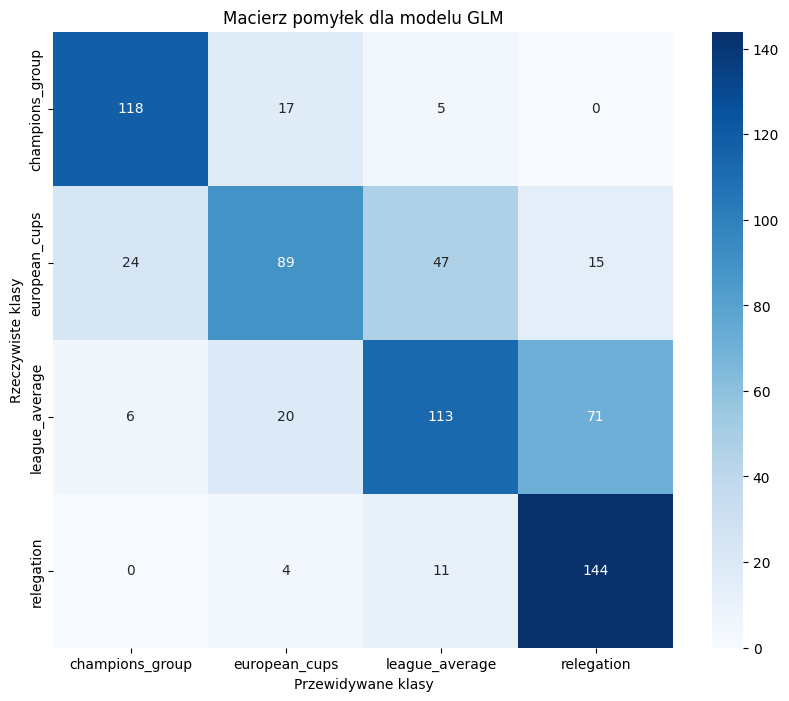

In [5]:
cm_glm = confusion_matrix(model_glm['y_encoded'], model_glm['y_pred_custom_glm'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm_glm, annot=True, fmt='d', cmap='Blues', xticklabels=model_glm['class_names'], yticklabels=model_glm['class_names'])
plt.xlabel('Przewidywane klasy')
plt.ylabel('Rzeczywiste klasy')
plt.title('Macierz pomyłek dla modelu GLM')
plt.show()

#### ROC Curve

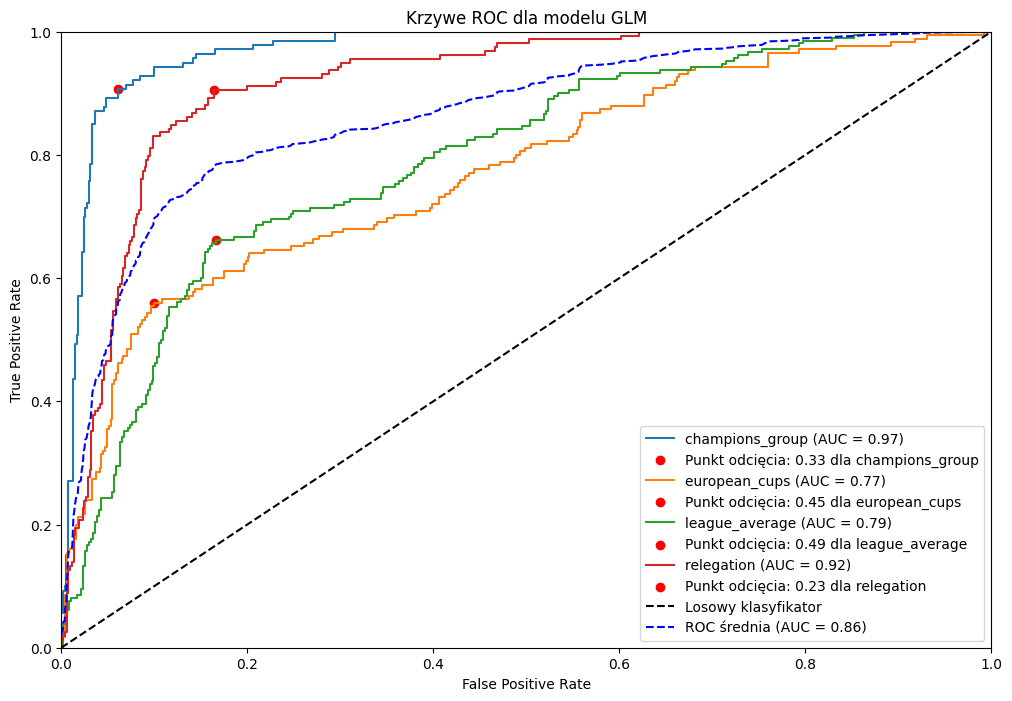

In [6]:
plt.figure(figsize=(12, 8))

for i in range(model_glm['n_classes']):
    plt.plot(model_glm['fpr_glm'][i], model_glm['tpr_glm'][i], label=f'{model_glm["class_names"][i]} (AUC = {model_glm["roc_auc_glm"][i]:.2f})')
    plt.scatter(model_glm['fpr_glm'][i][np.argmax(model_glm['tpr_glm'][i] - model_glm['fpr_glm'][i])], 
                model_glm['tpr_glm'][i][np.argmax(model_glm['tpr_glm'][i] - model_glm['fpr_glm'][i])],
                marker='o', color='red', label=f'Punkt odcięcia: {model_glm["best_thresholds_glm"][i]:.2f} dla {model_glm["class_names"][i]}')

plt.plot([0, 1], [0, 1], 'k--', label='Losowy klasyfikator')
plt.plot(model_glm['roc_glm'], model_glm['mean_tpr_glm'], color='blue', linestyle='--', label=f'ROC średnia (AUC = {model_glm["auc_glm"]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC dla modelu GLM')
plt.legend(loc="lower right")
plt.show()

#### Precision, Recall, F1

In [7]:
report_glm = classification_report(model_glm['y_encoded'], model_glm['y_pred_custom_glm'], target_names=model_glm['class_names'])
print(report_glm)

                 precision    recall  f1-score   support

champions_group       0.80      0.84      0.82       140
  european_cups       0.68      0.51      0.58       175
 league_average       0.64      0.54      0.59       210
     relegation       0.63      0.91      0.74       159

       accuracy                           0.68       684
      macro avg       0.69      0.70      0.68       684
   weighted avg       0.68      0.68      0.67       684



### 4. Decision Tree

In [8]:
model_tree= model.decision_tree_model()

#### Model Performance

#### Confusion Matrix

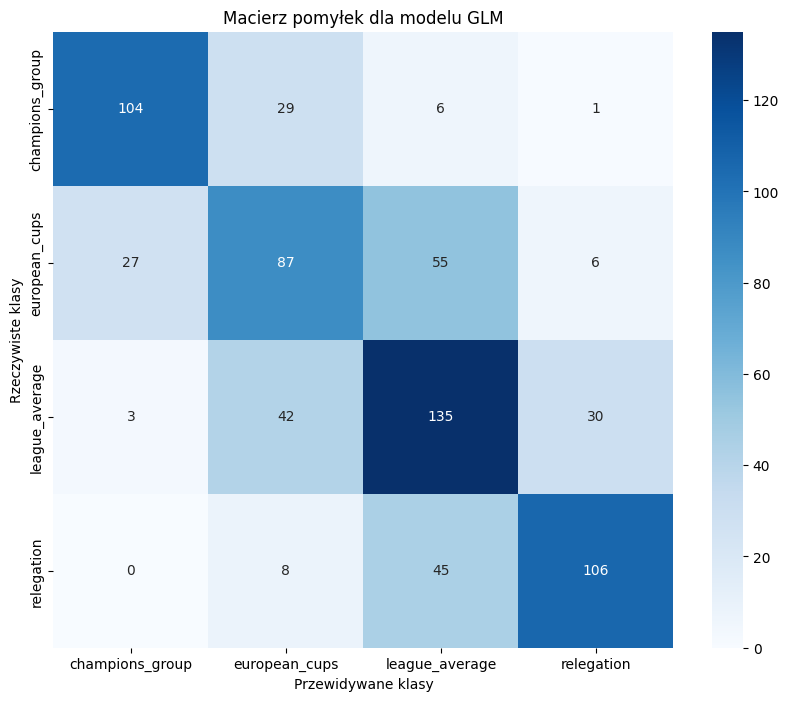

In [9]:
cm_tree = confusion_matrix(model_tree['y_encoded'], model_tree['y_pred_custom_tree'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=model_tree['class_names'], yticklabels=model_tree['class_names'])
plt.xlabel('Przewidywane klasy')
plt.ylabel('Rzeczywiste klasy')
plt.title('Macierz pomyłek dla modelu Decision Tree')
plt.show()

#### ROC Curve

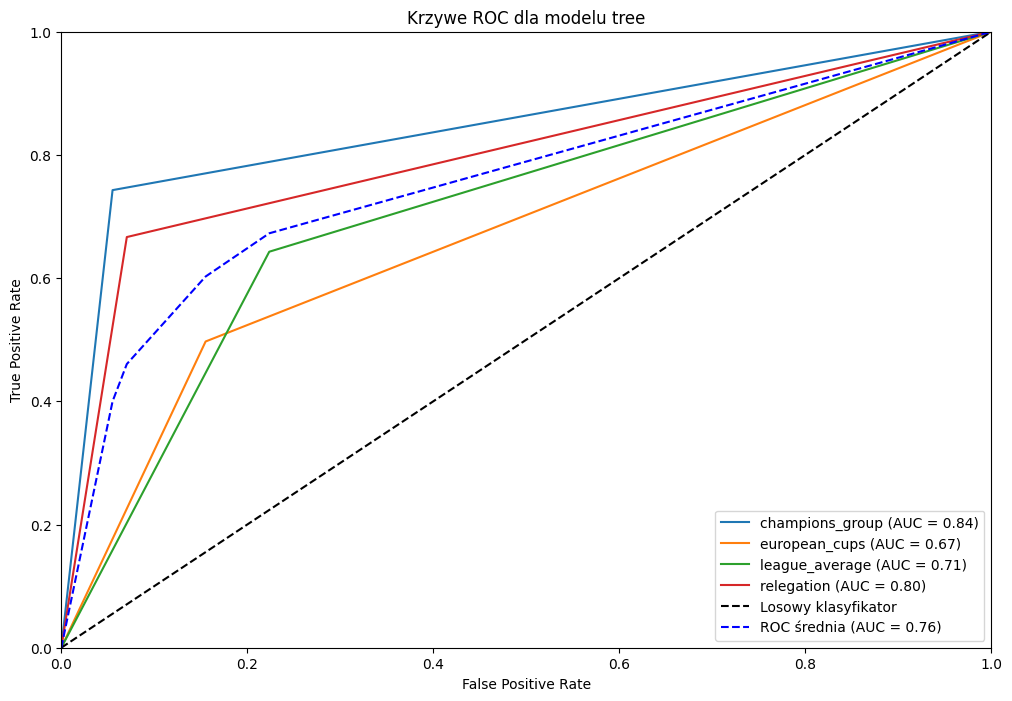

In [18]:
plt.figure(figsize=(12, 8))

for i in range(model_tree['n_classes']):
    plt.plot(model_tree['fpr_tree'][i], model_tree['tpr_tree'][i], label=f'{model_tree["class_names"][i]} (AUC = {model_tree["roc_auc_tree"][i]:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Losowy klasyfikator')
plt.plot(model_tree['roc_tree'], model_tree['mean_tpr_tree'], color='blue', linestyle='--', label=f'ROC średnia (AUC = {model_tree["auc_tree"]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC dla modelu tree')
plt.legend(loc="lower right")
plt.show()

#### Precision, Recall, F1

In [10]:
report_tree = classification_report(model_tree['y_encoded'], model_tree['y_pred_custom_tree'], target_names=model_tree['class_names'])
print(report_tree)

                 precision    recall  f1-score   support

champions_group       0.78      0.74      0.76       140
  european_cups       0.52      0.50      0.51       175
 league_average       0.56      0.64      0.60       210
     relegation       0.74      0.67      0.70       159

       accuracy                           0.63       684
      macro avg       0.65      0.64      0.64       684
   weighted avg       0.64      0.63      0.63       684



### 5. Random Forrest

In [11]:
model_rf= model.random_forest_model()

#### Model Performance

#### Confusion Matrix

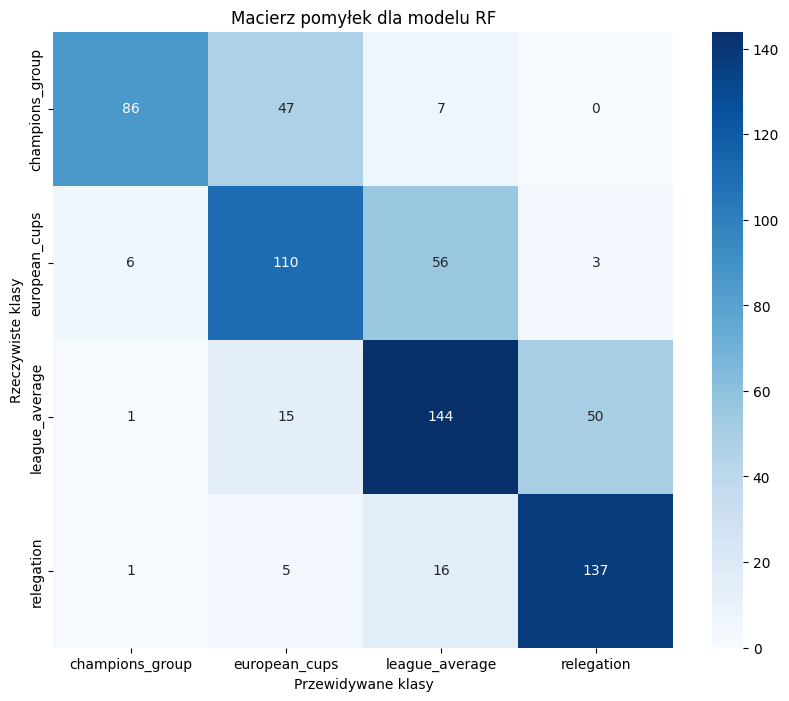

In [12]:
cm_rf = confusion_matrix(model_rf['y_encoded'], model_rf['y_pred_custom_rf'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf['class_names'], yticklabels=model_rf['class_names'])
plt.xlabel('Przewidywane klasy')
plt.ylabel('Rzeczywiste klasy')
plt.title('Macierz pomyłek dla modelu RF')
plt.show()

#### ROC Curve

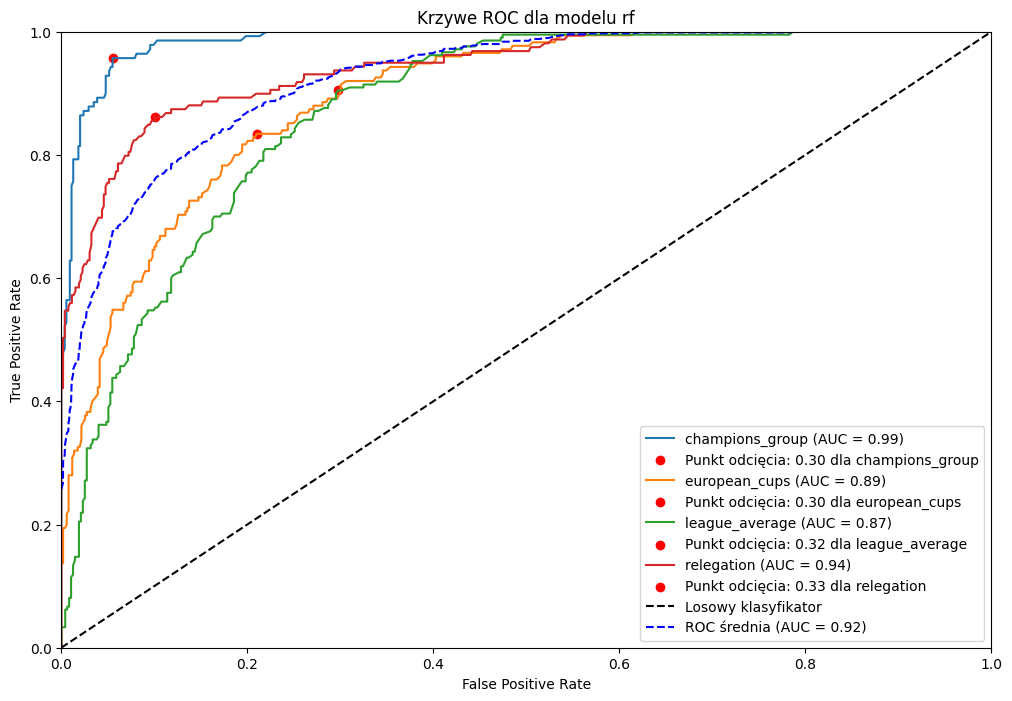

In [13]:
plt.figure(figsize=(12, 8))

for i in range(model_rf['n_classes']):
    plt.plot(model_rf['fpr_rf'][i], model_rf['tpr_rf'][i], label=f'{model_rf["class_names"][i]} (AUC = {model_rf["roc_auc_rf"][i]:.2f})')
    plt.scatter(model_rf['fpr_rf'][i][np.argmax(model_rf['tpr_rf'][i] - model_rf['fpr_rf'][i])], 
                model_rf['tpr_rf'][i][np.argmax(model_rf['tpr_rf'][i] - model_rf['fpr_rf'][i])],
                marker='o', color='red', label=f'Punkt odcięcia: {model_rf["best_thresholds_rf"][i]:.2f} dla {model_rf["class_names"][i]}')

plt.plot([0, 1], [0, 1], 'k--', label='Losowy klasyfikator')
plt.plot(model_rf['roc_rf'], model_rf['mean_tpr_rf'], color='blue', linestyle='--', label=f'ROC średnia (AUC = {model_rf["auc_rf"]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC dla modelu rf')
plt.legend(loc="lower right")
plt.show()

#### Precision, Recall, F1

In [14]:
report_rf = classification_report(model_rf['y_encoded'], model_rf['y_pred_custom_rf'], target_names=model_rf['class_names'])
print(report_rf)

                 precision    recall  f1-score   support

champions_group       0.91      0.61      0.74       140
  european_cups       0.62      0.63      0.62       175
 league_average       0.65      0.69      0.67       210
     relegation       0.72      0.86      0.79       159

       accuracy                           0.70       684
      macro avg       0.73      0.70      0.70       684
   weighted avg       0.71      0.70      0.70       684



In [15]:
model_rf['feature_importance_df'].iloc[:100]

,feature,importance
0,num__GF,0.093472
1,num__GA,0.075657
2,num__xG,0.069860
3,num__xGA,0.054807
4,num__Attendance,0.023220
...,...,...
121,num__onxG,0.004832
120,num__+/-90,0.004794
23,num__GA90,0.004745
25,num__Saves,0.004727


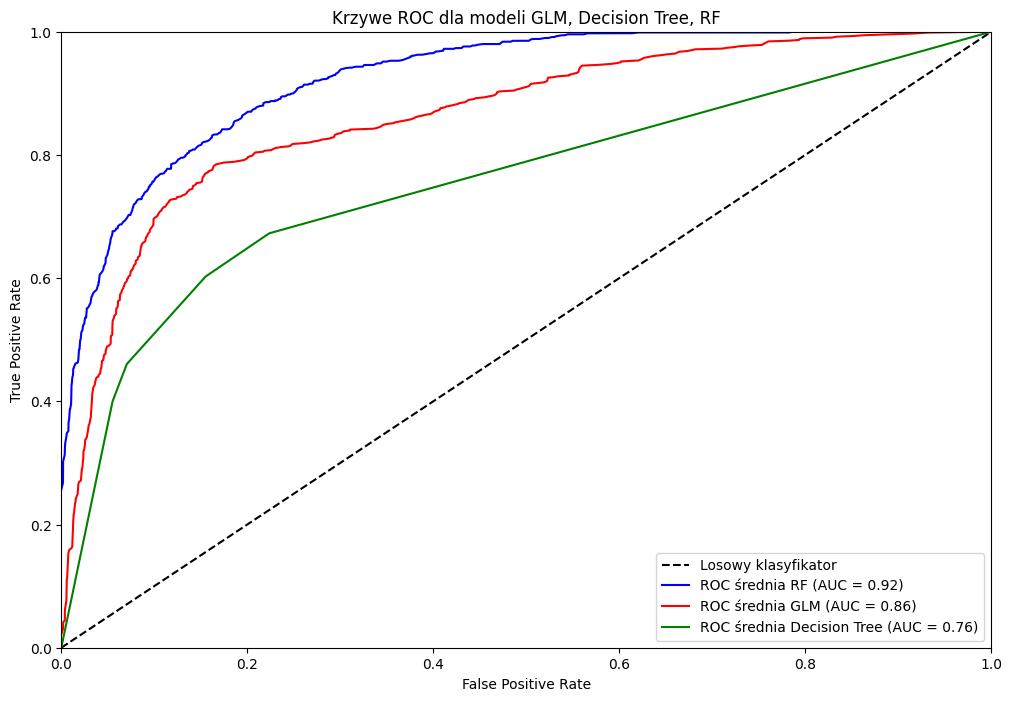

In [16]:
plt.figure(figsize=(12, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Losowy klasyfikator')
plt.plot(model_rf['roc_rf'], model_rf['mean_tpr_rf'], color='blue', linestyle='-', label=f'ROC średnia RF (AUC = {model_rf["auc_rf"]:.2f})')
plt.plot(model_glm['roc_glm'], model_glm['mean_tpr_glm'], color='red', linestyle='-', label=f'ROC średnia GLM (AUC = {model_glm["auc_glm"]:.2f})')
plt.plot(model_tree['roc_tree'], model_tree['mean_tpr_tree'], color='green', linestyle='-', label=f'ROC średnia Decision Tree (AUC = {model_tree["auc_tree"]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC dla modeli GLM, Decision Tree, RF')
plt.legend(loc="lower right")
plt.show()